In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from operator import attrgetter
import matplotlib.colors as mcolors

In [4]:
df = pd.read_csv('data/db_customers.csv',index_col=0)

#mettre en datetime les colones 
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

FileNotFoundError: [Errno 2] No such file or directory: 'db_customers.csv'

In [3]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


In [4]:
df[df.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaT,credit_card,1.0,65.95,2,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,NaN
49,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,NaT,boleto,1.0,22.36,1,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,health_beauty
111,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,NaT,boleto,1.0,50.35,3,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC,christmas_supplies
115,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-02-09 20:16:40,credit_card,1.0,42.40,5,34c58672601f2c6d29db7efd1f6bf958,38650,bonfinopolis de minas,MG,NaN
137,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,NaT,credit_card,2.0,138.28,5,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN
105250,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,NaT,boleto,1.0,144.56,1,965191786b70912f793e4a777fd623cd,13050,campinas,SP,watches_gifts
105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN
105288,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaT,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN


In [5]:
truc = df[['payment_type','payment_installments','review_score','customer_state','product_category_name_english']]

In [6]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 3.8 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

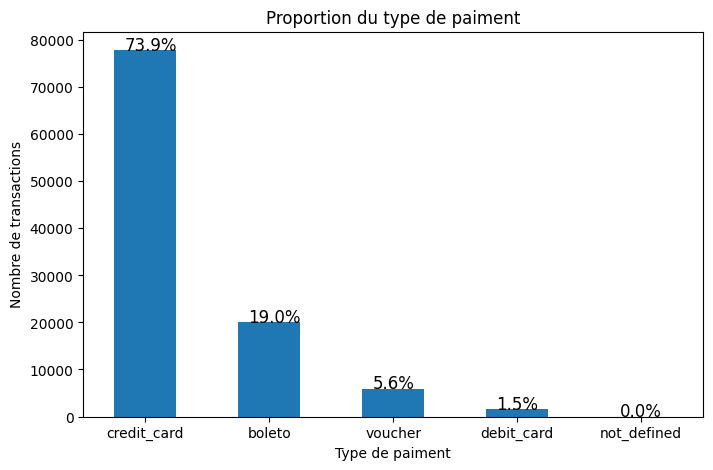

In [7]:
plt.figure(figsize=(8,5))
ax1 = truc['payment_type'].value_counts().plot(kind="bar")
ax1.set(xlabel ="Type de paiment", ylabel = "Nombre de transactions", title ='Proportion du type de paiment')
plt.xticks(rotation = 0)
without_hue(ax1, truc['payment_type'])

In [8]:
#Date snapshot pour la récense ( date qu'on utilise pour comparer le derniere achat )
snapshot_date = df['order_purchase_timestamp'].max() + timedelta(days=1)

In [9]:
#Groupby avec aggregate pour parametrer le groupby pour chaque colone 
#Lambda par rapport a la date pour la récense 
#count sur order id pour avoir le nombre d'achat par customer 
#Sum sur payment value pour le montant
data_process = df.groupby(['customer_unique_id']).agg({
        'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'payment_value': 'sum'})

In [10]:
#Changer le nom des columns du nouveau dataframe
data_process.rename(columns={'order_purchase_timestamp': 'Recency',
                         'order_id': 'Frequency',
                         'payment_value': 'MonetaryValue'}, inplace=True)

In [11]:
data_process.describe()

,Recency,Frequency,MonetaryValue
count,96096.000000,96096.000000,96096.000000
mean,288.735691,1.096643,169.558320
std,153.414676,0.534676,237.929113
min,1.000000,1.000000,0.000000
25%,164.000000,1.000000,63.220000
50%,269.000000,1.000000,108.300000
75%,398.000000,1.000000,185.495000
max,773.000000,54.000000,13664.080000


In [12]:
data_process['score_R'] = pd.cut(data_process['Recency'] , bins=[0, 269, 398, 774], labels=[3,2,1])
data_process['score_F'] = pd.cut(data_process['Frequency'] , bins=[0, 1, 5, 55], labels=[1,2,3])
data_process['score_M'] = pd.cut(data_process['MonetaryValue'] , bins=[0, 108, 185, 13665], labels=[1,2,3])

In [13]:
for i in data_process.columns:
    print(i)
    print('----------')
    print(data_process[i].value_counts())
    print("---------------------------------------------------------------")

Recency
----------
328    844
327    763
325    436
324    393
155    365
      ... 
763      1
17       1
726      1
765      1
31       1
Name: Recency, Length: 630, dtype: int64
---------------------------------------------------------------
Frequency
----------
1     89630
2      5130
3       794
4       283
5        84
6        72
7        32
8        16
9        12
10        8
11        7
12        6
13        4
14        3
24        3
15        3
19        2
22        1
26        1
18        1
29        1
17        1
54        1
23        1
Name: Frequency, dtype: int64
---------------------------------------------------------------
MonetaryValue
----------
77.57      242
35.00      162
73.34      148
116.94     125
65.00      111
          ... 
333.91       1
962.31       1
888.40       1
51.73        1
2067.42      1
Name: MonetaryValue, Length: 29097, dtype: int64
---------------------------------------------------------------
score_R
----------
3    48075
2    24067
1    239

In [14]:
# fig, axs = plt.subplots(1, 3, figsize=(10,3))
# axs = axs.flatten()
# fig.tight_layout(pad=2.5)
# for i, col in enumerate(data_process.columns):
#     sns.boxplot(data_process[col], ax=axs[i])

In [15]:
# fig, axs = plt.subplots(1, 3, figsize=(10,3))
# axs = axs.flatten()
# fig.tight_layout(pad=2.5)
# for i, col in enumerate(data_process.columns):
#     sns.distplot(x=data_process[col],rug=True, ax=axs[i])

In [16]:
n_orders = df.groupby(['customer_unique_id'])['order_id'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['customer_unique_id'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

3.12% of customers ordered more than once.


In [17]:
df['order_purchase_timestamp'] = pd.to_datetime(df["order_purchase_timestamp"].dt.strftime('%Y-%m'))
df['order_delivered_customer_date'] = pd.to_datetime(df["order_delivered_customer_date"].dt.strftime('%Y-%m'))

In [18]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-01,2017-10-01,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-01,2017-10-01,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-01,2017-10-01,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-01,2018-08-01,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-01,2018-08-01,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-01,2017-03-01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-01,2018-02-01,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-01,2017-09-01,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-01,2018-01-01,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


In [19]:
test = df[['customer_unique_id', 'order_id', 'order_purchase_timestamp']].drop_duplicates()

In [20]:
test

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-01
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-01
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-01
5,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-01
6,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-01
...,...,...,...
105378,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-01
105379,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-01
105380,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-01
105381,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-01


In [21]:
test['order_month'] = test['order_purchase_timestamp'].dt.to_period('M')
test['cohort'] = test.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [22]:
test

,customer_unique_id,order_id,order_purchase_timestamp,order_month,cohort
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-01,2017-10,2017-09
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-01,2018-07,2018-07
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-01,2018-08,2018-08
5,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-01,2017-11,2017-11
6,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-01,2018-02,2018-02
...,...,...,...,...,...
105378,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-01,2017-03,2017-03
105379,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-01,2018-02,2018-02
105380,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-01,2017-08,2017-08
105381,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-01,2018-01,2018-01


In [23]:
df_cohort = test.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [24]:
df_cohort

,cohort,order_month,n_customers,period_number
0,2016-09,2016-09,4,0
1,2016-10,2016-10,321,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
...,...,...,...,...
220,2018-08,2018-08,6271,0
221,2018-08,2018-09,7,1
222,2018-08,2018-10,2,2
223,2018-09,2018-09,5,0


In [25]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [26]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,321.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [27]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [28]:
cohort_size

cohort
2016-09       4.0
2016-10     321.0
2016-12       1.0
2017-01     764.0
2017-02    1752.0
2017-03    2636.0
2017-04    2352.0
2017-05    3596.0
2017-06    3139.0
2017-07    3894.0
2017-08    4184.0
2017-09    4130.0
2017-10    4470.0
2017-11    7304.0
2017-12    5487.0
2018-01    7025.0
2018-02    6451.0
2018-03    6965.0
2018-04    6711.0
2018-05    6622.0
2018-06    5940.0
2018-07    6071.0
2018-08    6271.0
2018-09       5.0
2018-10       1.0
Freq: M, Name: 0, dtype: float64

In [29]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003115,NaN,NaN,0.003115,NaN,0.003115,NaN,0.003115,NaN,0.003115,NaN,0.003115,0.006231,0.006231
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.003927,0.002618,0.001309,0.003927,0.001309,0.005236,0.001309,0.001309,NaN,0.003927,0.001309,0.007853,0.003927,0.001309,0.001309,0.002618,0.003927,0.001309,NaN
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,0.002854,0.001712,0.001712,0.001142,0.000571,0.000571,0.002283,NaN,NaN
2017-03,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,0.003794,0.001517,0.002276,0.001138,0.001517,0.002276,0.000759,0.001517,NaN,NaN
2017-04,1.0,0.005952,0.002126,0.001701,0.003401,0.002551,0.003401,0.002976,0.002976,0.001701,0.002551,0.000850,0.000850,0.000425,0.000850,0.000850,0.002126,NaN,NaN,NaN
2017-05,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,0.002503,0.003059,0.002503,0.003337,0.002503,0.000278,0.001947,0.002503,NaN,NaN,NaN,NaN
2017-06,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,0.002230,0.001274,0.002230,0.003186,0.003504,0.001593,0.001274,0.001911,NaN,NaN,NaN,NaN,NaN


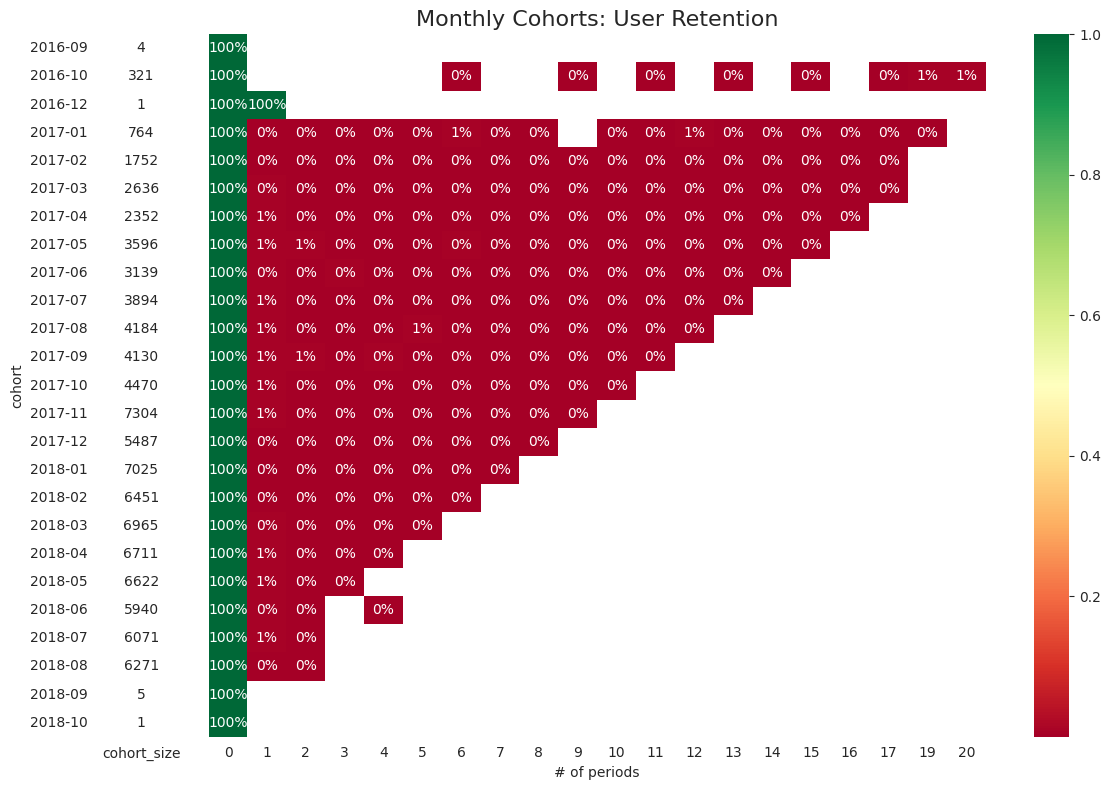

In [30]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])
    
    fig.tight_layout()

In [31]:
def info(df):
    print(df.info())
    print('------------')
    print(df.describe())
    print('------------')
    print(df.nunique())

In [32]:
def uninfo(df):
    for i in df:
        uni =df[i].unique()
        print(i)
        print(uni)
        print('-----------------')

In [33]:
info(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105383 entries, 0 to 105382
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105383 non-null  object        
 1   customer_id                    105383 non-null  object        
 2   order_status                   105383 non-null  object        
 3   order_purchase_timestamp       105383 non-null  datetime64[ns]
 4   order_delivered_customer_date  102224 non-null  datetime64[ns]
 5   payment_type                   105382 non-null  object        
 6   payment_installments           105382 non-null  float64       
 7   payment_value                  105382 non-null  float64       
 8   review_score                   105383 non-null  int64         
 9   customer_unique_id             105383 non-null  object        
 10  customer_zip_code_prefix       105383 non-null  int64         
 11  

In [34]:
uninfo(df)

order_id
['e481f51cbdc54678b7cc49136f2d6af7' '53cdb2fc8bc7dce0b6741e2150273451'
 '47770eb9100c2d0c44946d9cf07ec65d' ... '83c1379a015df1e13d02aae0204711ab'
 '11c177c8e97725db2631073c19f07b62' '66dea50a8b16d9b4dee7af250b4be1a5']
-----------------
customer_id
['9ef432eb6251297304e76186b10a928d' 'b0830fb4747a6c6d20dea0b8c802d7ef'
 '41ce2a54c0b03bf3443c3d931a367089' ... '1aa71eb042121263aafbe80c1b562c9c'
 'b331b74b18dc79bcdf6532d51e1637c1' 'edb027a75a1449115f6b43211ae02a24']
-----------------
order_status
['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
-----------------
order_purchase_timestamp
['2017-10-01T00:00:00.000000000' '2018-07-01T00:00:00.000000000'
 '2018-08-01T00:00:00.000000000' '2017-11-01T00:00:00.000000000'
 '2018-02-01T00:00:00.000000000' '2017-07-01T00:00:00.000000000'
 '2017-04-01T00:00:00.000000000' '2017-05-01T00:00:00.000000000'
 '2017-01-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-03-01T00:00:00.000000000